<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista2_Simula%C3%A7%C3%A3oEstoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1ª Questão Letra A:

In [45]:
%pip install simpy

In [46]:
import numpy as np
import simpy as sp

In [47]:
import simpy
import random
class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}")
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}")


def gera_chegadas(env, fila_mm1):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.0031217576850056357, tamanho da fila = 1
Cliente 1 saiu em 0.335471704907616, tamanho da fila = 0
Cliente 2 chegou à fila em 1.1210079425273776, tamanho da fila = 1
Cliente 3 chegou à fila em 1.2382702035596442, tamanho da fila = 2
Cliente 2 saiu em 1.3667085069189415, tamanho da fila = 1
Cliente 3 saiu em 1.477943326553874, tamanho da fila = 0
Cliente 4 chegou à fila em 1.6598516599800122, tamanho da fila = 1
Cliente 4 saiu em 1.892541574387842, tamanho da fila = 0
Cliente 5 chegou à fila em 3.1996915398861905, tamanho da fila = 1
Cliente 5 saiu em 3.4106691624082845, tamanho da fila = 0
Cliente 6 chegou à fila em 3.985524837173535, tamanho da fila = 1
Cliente 7 chegou à fila em 4.133825856324588, tamanho da fila = 2
Cliente 8 chegou à fila em 4.15566073011831, tamanho da fila = 3
Cliente 9 chegou à fila em 4.8876348976876445, tamanho da fila = 4
Cliente 10 chegou à fila em 4.904869165549329, tamanho da fila = 5
Cliente 6 saiu em 5.1709198237442475, tamanh

#1ª Questão Letra B:

In [48]:
import simpy
import random
global i
i = 0
class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=1)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.vetor_n = []

    def chegada_cliente(self, cliente):
        global i
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, iteração = {i}")
        with self.servidor.request() as req:
            yield req
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            i = i + 1
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, iteração = {i}")

def tam_media(vetor):
  if len(vetor) == 0: return 0
  return sum(vetor)/len(vetor)

def gera_chegadas(env, fila_mm1):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        media_old = tam_media(fila_mm1.vetor_n)
        vetor = [1]
        vetor_2 = fila_mm1.vetor_n
        result = vetor + vetor_2
        media_new = tam_media(result)
        if abs(media_new - media_old) <= 0.0004: break
        cliente += 1
        i = i + 1
        env.process(fila_mm1.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3)

env.process(gera_chegadas(env, fila))

env.run(until=100)


Cliente 1 chegou à fila em 0.10327534554164111, tamanho da fila = 1, iteração = 1
Cliente 1 saiu em 0.7141853220373926, tamanho da fila = 0, iteração = 2


#2ª Questão Letra A:

In [56]:
import simpy
import random
class FilaMM1:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.env = env
        self.servidor = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.tamanho_da_fila = 0
        self.qtd_atendimento = 0
        self.vetor_n = []
        self.vetor_a = []

    def chegada_cliente(self, cliente):
        self.tamanho_da_fila = self.tamanho_da_fila + 1
        self.vetor_n.append(self.tamanho_da_fila)
        print(f"Cliente {cliente} chegou à fila em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")
        with self.servidor.request() as req:
            yield req
            self.qtd_atendimento = self.qtd_atendimento + 1
            self.vetor_a.append(self.qtd_atendimento)
            yield self.env.timeout(np.random.exponential(1/self.taxa_servico))
            self.tamanho_da_fila = self.tamanho_da_fila - 1
            self.vetor_n.append(self.tamanho_da_fila)
            self.qtd_atendimento = self.qtd_atendimento - 1
            self.vetor_a.append(self.qtd_atendimento)
            print(f"Cliente {cliente} saiu em {self.env.now}, tamanho da fila = {self.tamanho_da_fila}, Pessoas em atendimento = {self.qtd_atendimento}")

def gera_chegadas(env, fila_mm1):
    cliente = 0
    global i
    while True:
        yield env.timeout(np.random.exponential(1/fila_mm1.taxa_chegada))
        cliente += 1
        i = i + 1
        env.process(fila_mm1.chegada_cliente(cliente))

c = 2 #Quantidade de atendentes no sistema
env = simpy.Environment()
fila = FilaMM1(env, taxa_chegada=2, taxa_servico=3, num_servidores = c)
vetor_n = fila.vetor_n
vetor_a = fila.vetor_a

env.process(gera_chegadas(env, fila))

env.run(until=50)


Cliente 1 chegou à fila em 0.20854588646826583, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 1 saiu em 0.3107512082832591, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 2 chegou à fila em 0.6763452507423134, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 2 saiu em 0.7096144530322613, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 3 chegou à fila em 1.4376220372154904, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 3 saiu em 1.6988743982225802, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 4 chegou à fila em 1.864943204249478, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 4 saiu em 1.8688946384877398, tamanho da fila = 0, Pessoas em atendimento = 0
Cliente 5 chegou à fila em 2.9986573021642577, tamanho da fila = 1, Pessoas em atendimento = 0
Cliente 6 chegou à fila em 3.0275902328217064, tamanho da fila = 2, Pessoas em atendimento = 1
Cliente 5 saiu em 3.3211404616897893, tamanho da fila = 1, Pessoas em atendimento = 1


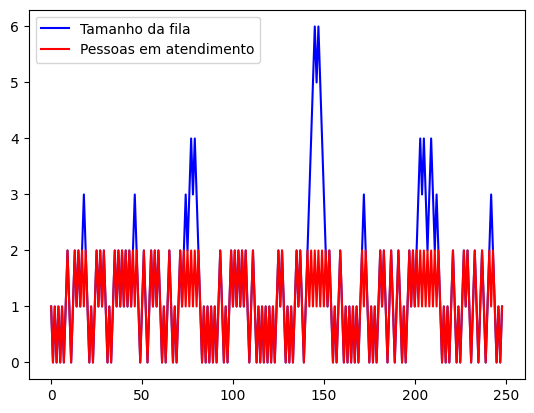

In [59]:
# Plot do tamanho da fila e a quantidade de pessoas em atendimento
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(vetor_n))]
aux.plot(eixo_x, vetor_n, color = 'blue', label = 'Tamanho da fila')
aux.legend(loc='upper left')
aux.plot(eixo_x, vetor_a, color = 'red', label = 'Pessoas em atendimento')
aux.legend(loc='upper left')
plt.show()